机器翻译不能使用传统的循环神经网络，原因在于输入序列长度与输出序列长度不同，一般采用Sequence to Sequence

预处理

1、去除乱码，解决编码问题
2、大小写
3、在单词和标点符号之间加入空格（）
4、分词，得到每个句子构成的列表


载入数据集

1、长度超过max_len则截断，不足padding补齐
2、对于target句子，加入eos和bos

Encoder输入经过循环神经网络生成一个语义编码（隐藏状态），是下一个循环神经网络Decoder的h-1，h0是bos（开始符），接收到h-1后预测h0，再将h0的单词拿出，到下一个循环神经元预测h1，直到eos。Decoder每个循环神经元生成的向量，要通过一个dense全连接层，映射到单词的词向量

由于之前进行了padding操作，所以之后计算损失函数时，需要将padding补齐的长度去除，

当前时间步的输出

1、贪心搜索，考虑当前最优解
2、维特比算法：选择整体分数最高的句子（搜索空间太大）
3、beam search，比如首先考虑前两个得分最高的 AC，然后再在以A和C开头的单词中找出最好的两个，以此类推
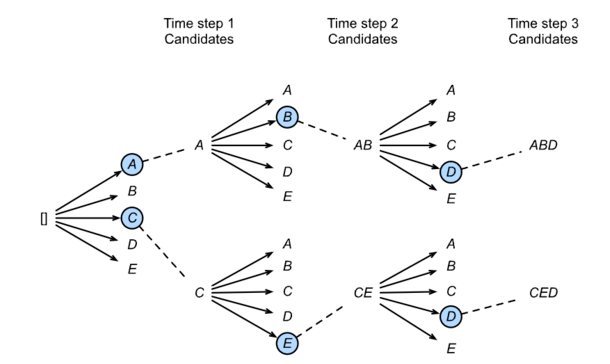

Attention是在最后softmax的输入进行改动，在原有ht的基础上又拼接了一个attention vector，而该attention vector记录的是过去信息，给过去信息赋予不同的权重，权重由socre进行softmax计算，score的计算需要一个矩阵w来形成1乘1的向量。

Transformer：为了整合CNN和RNN的优势，CNN易于并行化，却不适合捕捉变长序列内的依赖关系，而RNN适合捕捉长距离变长序列的依赖，但是却难以实现并行化处理序列。该模型利用attention机制实现了并行化捕捉序列依赖，并且同时处理序列的每个位置的tokens，上述优势使得Transformer模型在性能优异的同时大大减少了训练时间。